In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle


In [3]:
f=open('dataset.pickle', "rb")
(X_train, y_train, X_val, y_val, X_test, y_test)=pickle.load(f)

In [44]:
model=tf.keras.Sequential()

In [45]:
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="tanh",
                                input_shape=(32,32,1)
                                )
         )
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="tanh"
                                )
         )
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="tanh"
                                )
         )

In [46]:

model.add(tf.keras.layers.Flatten())

In [47]:
model.add(tf.keras.layers.Dense(64, activation="tanh"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="tanh"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [48]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [ ]:
results=model.fit(X_train, y_train,
                 epochs=40,
                 validation_data=(X_val, y_val))

Epoch 1/40
219/219 [==============================] - 4s 14ms/step - loss: 2.2600 - accuracy: 0.2341 - val_loss: 1.6038 - val_accuracy: 0.3929
Epoch 2/40
219/219 [==============================] - 3s 11ms/step - loss: 1.8917 - accuracy: 0.3286 - val_loss: 1.4373 - val_accuracy: 0.5246
Epoch 3/40
219/219 [==============================] - 2s 11ms/step - loss: 1.6574 - accuracy: 0.4139 - val_loss: 1.3298 - val_accuracy: 0.5338
Epoch 4/40
219/219 [==============================] - 3s 12ms/step - loss: 1.5327 - accuracy: 0.4520 - val_loss: 1.3440 - val_accuracy: 0.5487
Epoch 5/40
219/219 [==============================] - 3s 12ms/step - loss: 1.4113 - accuracy: 0.5065 - val_loss: 1.2088 - val_accuracy: 0.5934
Epoch 6/40
219/219 [==============================] - 3s 12ms/step - loss: 1.3443 - accuracy: 0.5300 - val_loss: 1.1863 - val_accuracy: 0.5865
Epoch 7/40
219/219 [==============================] - 3s 12ms/step - loss: 1.3246 - accuracy: 0.5394 - val_loss: 1.1780 - val_accuracy: 0.5762

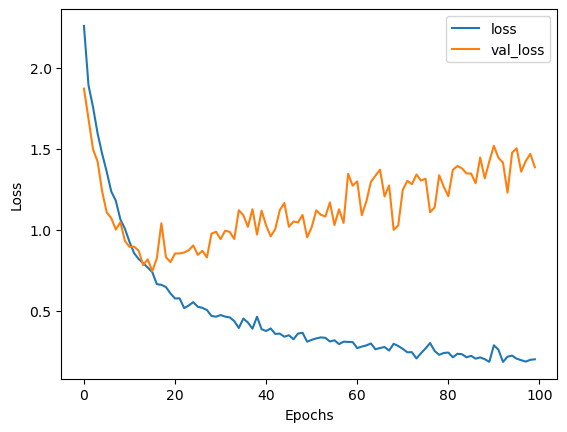

In [37]:
plt.plot(results.history['loss'], label="loss")
# Plot the the validation loss
plt.plot(results.history['val_loss'], label="val_loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
# Show the plot
plt.show()

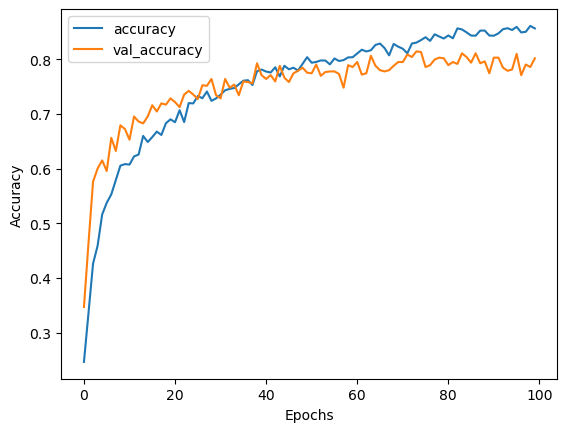

In [42]:
plt.plot(results.history['accuracy'], label="accuracy")


# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [41]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 15ms/step - loss: 0.6649 - accuracy: 0.8078


[0.6648734211921692, 0.8077803254127502]